<a href="https://colab.research.google.com/github/JTStephens18/text2scene/blob/main/text2scene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install langSAM
2. Install stable diffusion inpatining LDM
3. Install HiFA

Get segment mask using langSAM
Pass the mask along with original image into inpatining LDM to smooth the background





In [1]:
# !pip install torch==2.3.1
!pip install torchvision
!pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git
!pip install diffusers transformers accelerate scipy safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 6.2 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.3.1
    Uninstalling triton-2.3.1:
      Successfully uninstalled triton-2.3.1
  Attempting uninstall: torch
    Found existing installation: torch 2.3.1
    Uninstalling torch-2.3.1:
      Successfully uninstalled torch-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lang-sam 0.1.0 requires huggingface-hub<0.17.0,>=0.16.4, but you have huggingface-hub 0.23.4 which is incompatible.
  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-tckm6b2m
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-tckm6b2m
  R

# Text2Room

In [ ]:
!git clone "https://github.com/lukasHoel/text2room.git"
# !pip install -r requirements.txt
# %cd /content
%cd text2room

Cloning into 'text2room'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 96 (delta 16), reused 14 (delta 4), pack-reused 59
Receiving objects: 100% (96/96), 9.05 MiB | 16.24 MiB/s, done.
Resolving deltas: 100% (29/29), done.
/content/text2room


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

import shutil
import os

# Define the source and destination paths
source_folder = '/content/drive/MyDrive/text2scene/'  # Replace with the path to your source folder
destination_folder = '/content/text2room/checkpoints/'  # Replace with the path to your destination folder

# Copy files from source to destination
for filename in os.listdir(source_folder):
    print(filename)
    source_file = os.path.join(source_folder, filename)
    destination_file = os.path.join(destination_folder, filename)
    shutil.copy(source_file, destination_file)

normal_scannet.pt
irondepth_scannet.pt


In [ ]:
# %cd text2room
# !pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

!conda create -n text2scene python=3.9
!conda activate text2scene
!pip install -r requirements.txt
# !conda pytorch=1.13.0 torchvision pytorch-cuda=11.6 -c pytorch -c nvidia
# !conda install -c fvcore -c iopath -c conda-forge fvcore iopath
# !conda install -c bottler nvidiacub
# !conda install pytorch3d -c pytorch3d

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:08
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/text2scene

  added / updated specs:
    - python=3.9


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.6.2   |       hbcca054_0         152 KB  conda-forge
    ld_impl_linux-64-2.40      |       hf3520f5_7         691 KB  conda-forge
    libgcc-ng-13.2.0           |      h77fa898_10         784 KB  conda-forge
 

In [ ]:
import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=2a8c9af4c9b63bb4e8ad49e56fe313a3e2b058d9d2bf060b08a8895f0d4e63d2
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=925e12457fee1a2426fa57ca968a4d0379041483e0ccb4161735043b8b17eb1e
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py310_cu117_pyt1131/download.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 248.7 MB/s eta 0:00:00


In [ ]:
# !conda activate text2scene
%cd text2room
!python generate_scene.py

Streaming output truncated to the last 5000 lines.
Generating Next Image:  74% 37/50 [00:07<00:02,  4.80it/s]
Generating Next Image:  76% 38/50 [00:08<00:02,  4.80it/s]
Generating Next Image:  78% 39/50 [00:08<00:02,  4.79it/s]
Generating Next Image:  80% 40/50 [00:08<00:02,  4.81it/s]
Generating Next Image:  82% 41/50 [00:08<00:01,  4.80it/s]
Generating Next Image:  84% 42/50 [00:08<00:01,  4.79it/s]
Generating Next Image:  86% 43/50 [00:09<00:01,  4.79it/s]
Generating Next Image:  88% 44/50 [00:09<00:01,  4.79it/s]
Generating Next Image:  90% 45/50 [00:09<00:01,  4.81it/s]
Generating Next Image:  92% 46/50 [00:09<00:00,  4.81it/s]
Generating Next Image:  94% 47/50 [00:09<00:00,  4.81it/s]
Generating Next Image:  96% 48/50 [00:10<00:00,  4.80it/s]
Generating Next Image:  98% 49/50 [00:10<00:00,  4.80it/s]
Generating Next Image: 100% 50/50 [00:10<00:00,  4.81it/s]
Image [9/9]: 100% 10/10 [02:37<00:00, 15.71s/it]
Image [0/9]:   0% 0/10 [00:00<?, ?it/s]
Generating Next Image:   0% 0/50 [

# SD Inpainting

In [ ]:
# !git clone https://huggingface.co/stabilityai/stable-diffusion-2-inpainting
# !git clone https://huggingface.co/stabilityai/stable-diffusion-2-1
# !ln -s /stable-diffusion-2-inpainting checkpoints
# !ln -s /stable-diffusion-2-1 checkpoints

Cloning into 'stable-diffusion-2-inpainting'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 153 (delta 61), reused 153 (delta 61), pack-reused 0 (from 0)
Receiving objects: 100% (153/153), 534.61 KiB | 18.43 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Filtering content: 100% (15/15), 16.13 GiB | 20.58 MiB/s, done.
Encountered 2 file(s) that may not have been copied correctly on Windows:
	512-inpainting-ema.safetensors
	512-inpainting-ema.ckpt

See: `git lfs help smudge` for more details.
Cloning into 'stable-diffusion-2-1'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 118 (delta 40), reused 118 (delta 40), pack-reused 0 (from 0)
Receiving objects: 100% (118/118), 530.70 KiB | 2.23 MiB/s, done.
Resolving deltas: 100% (40/40), done.

Exiting because of "interrupt" signa

In [3]:
import torch
from PIL import Image
from lang_sam import LangSAM
import numpy as np
from diffusers import StableDiffusionInpaintPipeline

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [ ]:
model = LangSAM()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


GroundingDINO_SwinB.cfg.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:15<00:00, 166MB/s]


In [ ]:
image_pil = Image.open('./catBench2.jpg').resize((1024, 1024)).convert('RGB')
text_prompt = 'cat'
masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

In [ ]:
from torchvision.utils import draw_bounding_boxes
from torchvision.utils import draw_segmentation_masks

def draw_image(image, masks, boxes, labels, alpha=0.4):
    image = torch.from_numpy(image).permute(2, 0, 1)
    if len(boxes) > 0:
        image = draw_bounding_boxes(image, boxes, colors=['red'] * len(boxes), labels=labels, width=2)
    if len(masks) > 0:
        image = draw_segmentation_masks(image, masks=masks, colors=['cyan'] * len(masks), alpha=alpha)
    return image.numpy().transpose(1, 2, 0)


def draw_masked_image(image, masks, alpha=0.4):
  image = torch.from_numpy(image).permute(2, 0, 1)
  if len(masks) > 0:
    image = draw_segmentation_masks(image, masks=masks, colors=['white'] * len(masks), alpha=1.0)
  return image.numpy().transpose(1, 2, 0)

In [ ]:
labels = [f"{phrase} {logit:.2f}" for phrase, logit in zip(phrases, logits)]
image_arr = np.asarray(image_pil)
image = draw_image(image_arr, masks, boxes, labels)
image = Image.fromarray(np.uint8(image)).convert("RGB")

In [ ]:
zero = np.zeros_like(image_arr)
masked_img = draw_masked_image(zero, masks)
masked_img = Image.fromarray(np.uint8(masked_img)).convert("RGB")

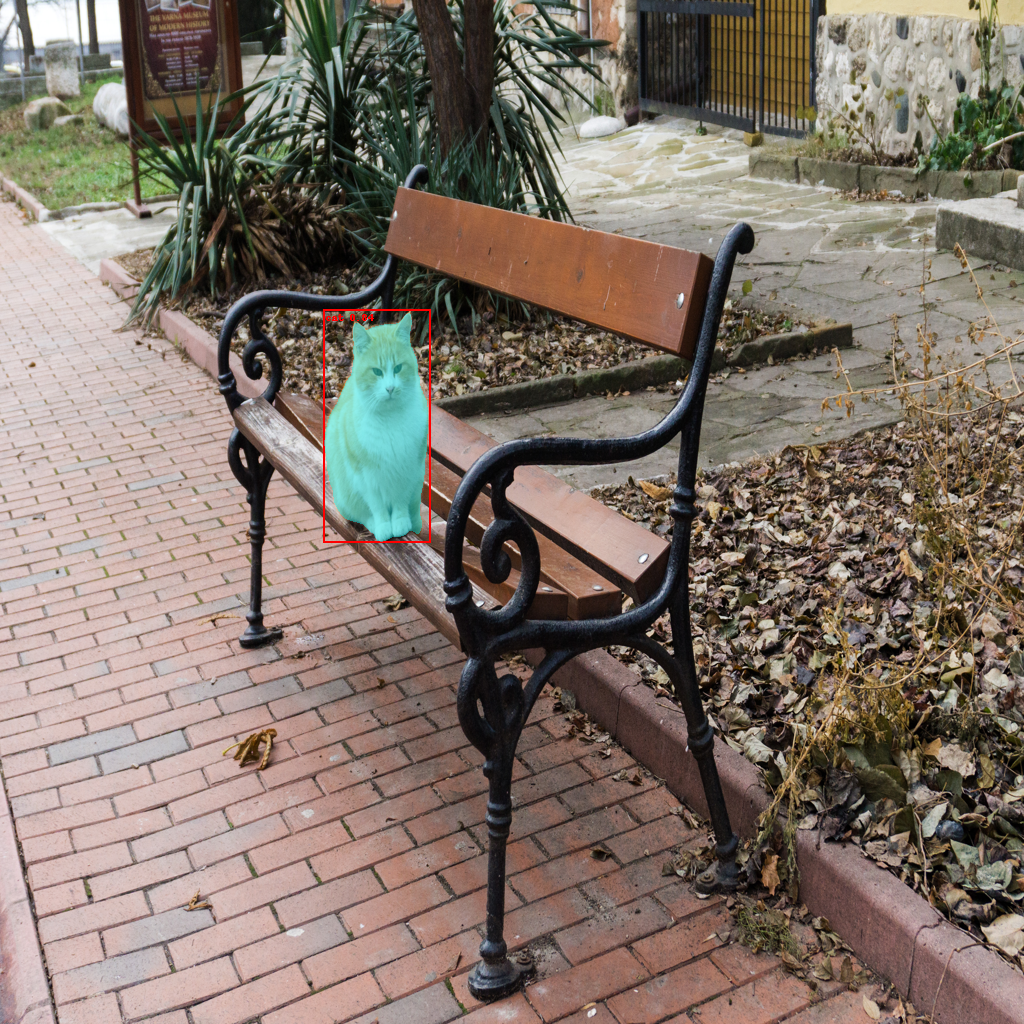

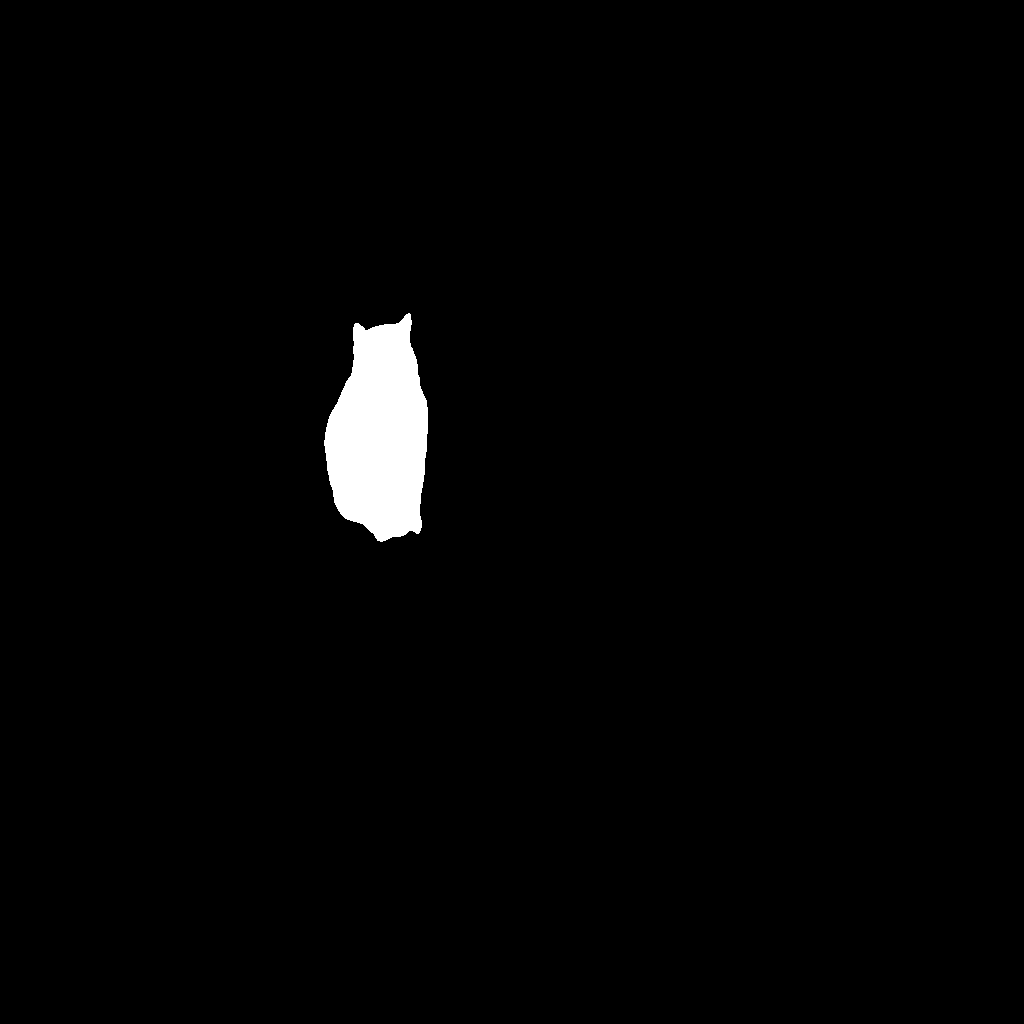

In [ ]:
display(image)
display(masked_img)

In [5]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
print(pipe)

StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "stabilityai/stable-diffusion-2-inpainting",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



In [7]:
print(pipe.unet)

UNet2DConditionModel(
  (conv_in): Conv2d(9, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Linear(in_features=320, out_features=320, bias=True)
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_f

In [14]:
print(pipe.vae)

AutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (c

In [8]:
for name, param in pipe.vae.named_parameters():
    print(f"Parameter name: {name}")
    print(f"Parameter shape: {param.shape}")
    print(f"Parameter values: {param}")

Streaming output truncated to the last 5000 lines.
          [-9.8572e-02, -8.8120e-03,  2.9816e-02],
          [ 1.5221e-02, -2.6947e-02, -7.6172e-02]],

         ...,

         [[ 3.1799e-02,  6.1340e-02,  4.2725e-02],
          [-1.1493e-01, -1.0010e-02, -2.2247e-02],
          [-3.5400e-02,  8.9233e-02, -1.0811e-02]],

         [[ 5.4741e-03, -2.8336e-02, -2.2827e-02],
          [-3.3813e-02, -4.7882e-02, -2.1362e-03],
          [ 2.4628e-02,  1.4717e-02,  2.3529e-02]],

         [[ 2.0972e-01,  1.2366e-01,  6.9763e-02],
          [-2.5024e-02, -6.6650e-02, -1.4294e-01],
          [ 9.2407e-02, -7.2327e-02,  1.4969e-02]]],


        [[[ 3.5187e-02,  2.2247e-02,  1.2062e-02],
          [ 5.6824e-02, -9.5947e-02,  4.8889e-02],
          [-8.9417e-03, -1.1060e-01,  1.4014e-01]],

         [[-5.7831e-02, -2.9449e-02, -1.6983e-02],
          [-9.2346e-02,  7.8186e-02, -3.8849e-02],
          [ 8.2825e-02,  1.1206e-01,  1.0266e-01]],

         [[-1.9119e-02,  3.2135e-02, -6.8909e-02],
  

In [8]:
encoder = pipe.vae.encode
print(encoder)

<bound method apply_forward_hook.<locals>.wrapper of AutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): Grou

In [9]:
import torchvision.transforms as transforms
# img = Image.open('./catBench2.jpg').resize((1024, 1024)).convert('RGB')
img = Image.open('./catBench.jpg').resize((512, 512)).convert('RGB')
transform = transforms.Compose([
    transforms.PILToTensor()
])

img_tensor = transform(img) / 255
img_tensor = img_tensor.to(torch.float16)
img_tensor = img_tensor.unsqueeze(0).to("cuda")

print(img_tensor)
print(img_tensor.shape)

tensor([[[[0.5293, 0.5254, 0.5137,  ..., 0.7412, 0.7803, 0.7920],
          [0.5332, 0.5293, 0.5176,  ..., 0.7451, 0.7803, 0.7920],
          [0.5410, 0.5332, 0.5215,  ..., 0.7490, 0.7803, 0.7920],
          ...,
          [0.4353, 0.4353, 0.4353,  ..., 0.4980, 0.4902, 0.4902],
          [0.4353, 0.4353, 0.4314,  ..., 0.5020, 0.4941, 0.4941],
          [0.4353, 0.4353, 0.4314,  ..., 0.5059, 0.4980, 0.4980]],

         [[0.5215, 0.5176, 0.5059,  ..., 0.7334, 0.7646, 0.7803],
          [0.5254, 0.5215, 0.5098,  ..., 0.7334, 0.7646, 0.7764],
          [0.5332, 0.5254, 0.5137,  ..., 0.7373, 0.7646, 0.7764],
          ...,
          [0.4392, 0.4392, 0.4392,  ..., 0.4980, 0.4902, 0.4902],
          [0.4392, 0.4392, 0.4353,  ..., 0.5020, 0.4941, 0.4941],
          [0.4392, 0.4392, 0.4353,  ..., 0.5059, 0.4980, 0.4980]],

         [[0.5332, 0.5293, 0.5137,  ..., 0.5527, 0.5923, 0.6040],
          [0.5371, 0.5332, 0.5176,  ..., 0.5527, 0.5884, 0.6001],
          [0.5449, 0.5371, 0.5215,  ..., 0

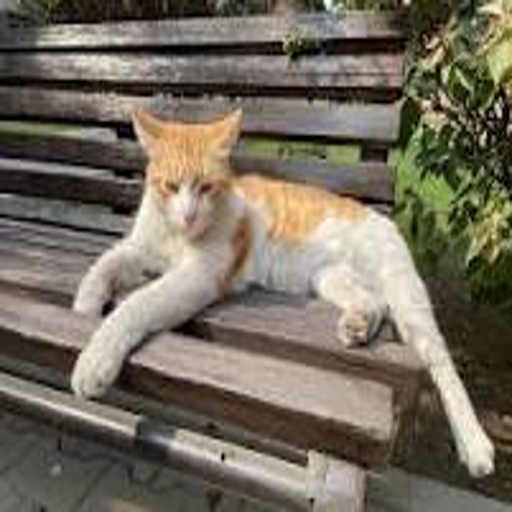

In [9]:
img

In [10]:
posterior = encoder(img_tensor).latent_dist

In [11]:
z = posterior.mode()

In [15]:
temp = encoder(img_tensor)
print(temp)

AutoencoderKLOutput(latent_dist=<diffusers.models.autoencoders.vae.DiagonalGaussianDistribution object at 0x7e68c38952d0>)


In [14]:
decoder = pipe.vae.decode
pred = decoder(z).sample
print(pred)
print(pred.shape)

tensor([[[[0.5186, 0.5176, 0.5020,  ..., 0.7607, 0.7446, 0.7183],
          [0.5298, 0.5264, 0.5093,  ..., 0.7832, 0.7456, 0.7358],
          [0.5269, 0.5171, 0.5020,  ..., 0.7969, 0.7783, 0.7651],
          ...,
          [0.4517, 0.4453, 0.4463,  ..., 0.5063, 0.5029, 0.5049],
          [0.4399, 0.4351, 0.4429,  ..., 0.4946, 0.4990, 0.5098],
          [0.4434, 0.4312, 0.4482,  ..., 0.4858, 0.4893, 0.4946]],

         [[0.5288, 0.5229, 0.5146,  ..., 0.7363, 0.7056, 0.6787],
          [0.5288, 0.5244, 0.4983,  ..., 0.7520, 0.7139, 0.6953],
          [0.5264, 0.5298, 0.5073,  ..., 0.7788, 0.7388, 0.7134],
          ...,
          [0.4492, 0.4473, 0.4529,  ..., 0.5039, 0.4934, 0.5063],
          [0.4487, 0.4485, 0.4492,  ..., 0.4934, 0.4949, 0.5098],
          [0.4480, 0.4485, 0.4492,  ..., 0.4861, 0.5029, 0.4954]],

         [[0.4849, 0.5029, 0.4839,  ..., 0.5742, 0.5308, 0.4902],
          [0.4956, 0.4966, 0.4746,  ..., 0.5879, 0.5474, 0.5020],
          [0.5000, 0.4902, 0.4692,  ..., 0

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


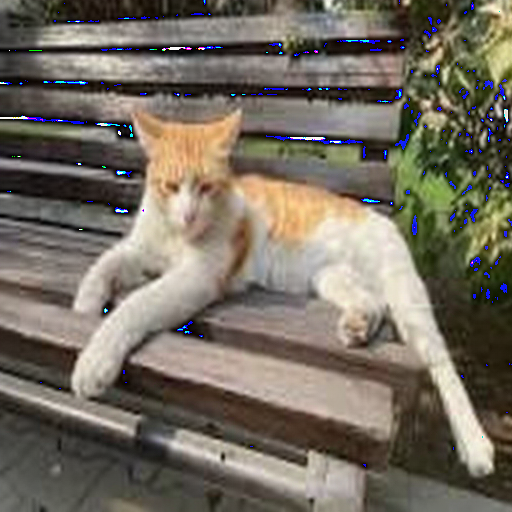

In [15]:
transform_pred = transforms.Compose([
    transforms.ToPILImage()
])

new_img = transform_pred(pred[0])
new_img

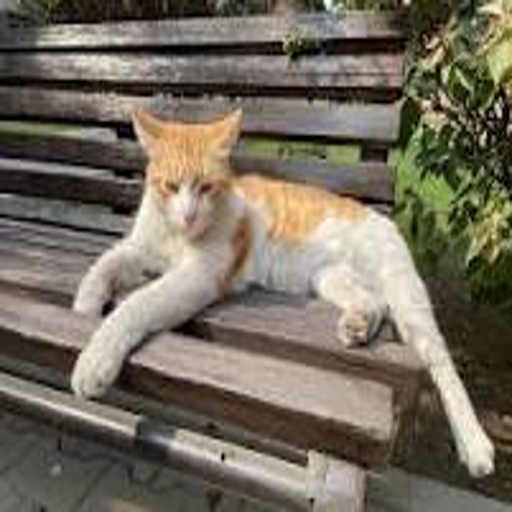

In [11]:
t_img_t = transform_pred(img_tensor[0])
t_img_t

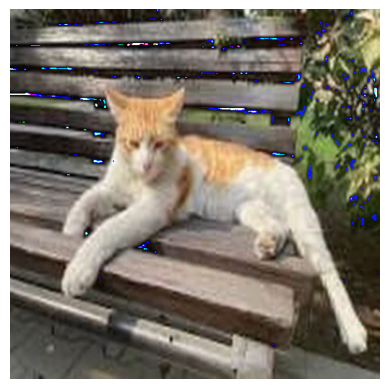

In [16]:
import matplotlib.pyplot as plt

test = pred[0] * 255
# test = img_tensor[0] * 255

image_tensor = test.to(torch.uint8).permute(1, 2, 0).cpu()

# Convert the tensor to a NumPy array
image_np = image_tensor.numpy()

# Display the image using matplotlib
plt.imshow(image_np)
plt.axis('off')  # Hide the axis
plt.show()

In [4]:
print(torch.__version__)

2.3.0+cu121


In [ ]:
pipe.to("cuda")
# pipe.to('cpu')
prompt = "wooden park bench"
#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
image = pipe(prompt=prompt, image=image_pil, mask_image=masked_img).images[0]
image.save("./yellow_cat_on_park_bench.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [5]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image

/usr/local/lib/python3.10/dist-packages/diffusers/models/vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQEncoderOutput`, instead.
  deprecate("VQEncoderOutput", "0.31", deprecation_message)
/usr/local/lib/python3.10/dist-packages/diffusers/models/vq_model.py:25: FutureWarning: `VQModel` is deprecated and will be removed in version 0.31. Importing `VQModel` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQModel`, instead.
  deprecate("VQModel", "0.31", deprecation_message)


In [7]:
# pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [8]:
print(pipe)

StableDiffusionXLInpaintPipeline {
  "_class_name": "StableDiffusionXLInpaintPipeline",
  "_diffusers_version": "0.29.1",
  "_name_or_path": "diffusers/stable-diffusion-xl-1.0-inpainting-0.1",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "requires_aesthetics_score": false,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



In [ ]:
prompt = "wooden park bench"
generator = torch.Generator(device="cuda").manual_seed(0)

image = pipe(
  prompt=prompt,
  image=image_pil,
  mask_image=masked_img,
  guidance_scale=8.0,
  num_inference_steps=20,  # steps between 15 and 30 work well for us
  strength=0.99,  # make sure to use `strength` below 1.0
  generator=generator,
).images[0]

  0%|          | 0/19 [00:00<?, ?it/s]

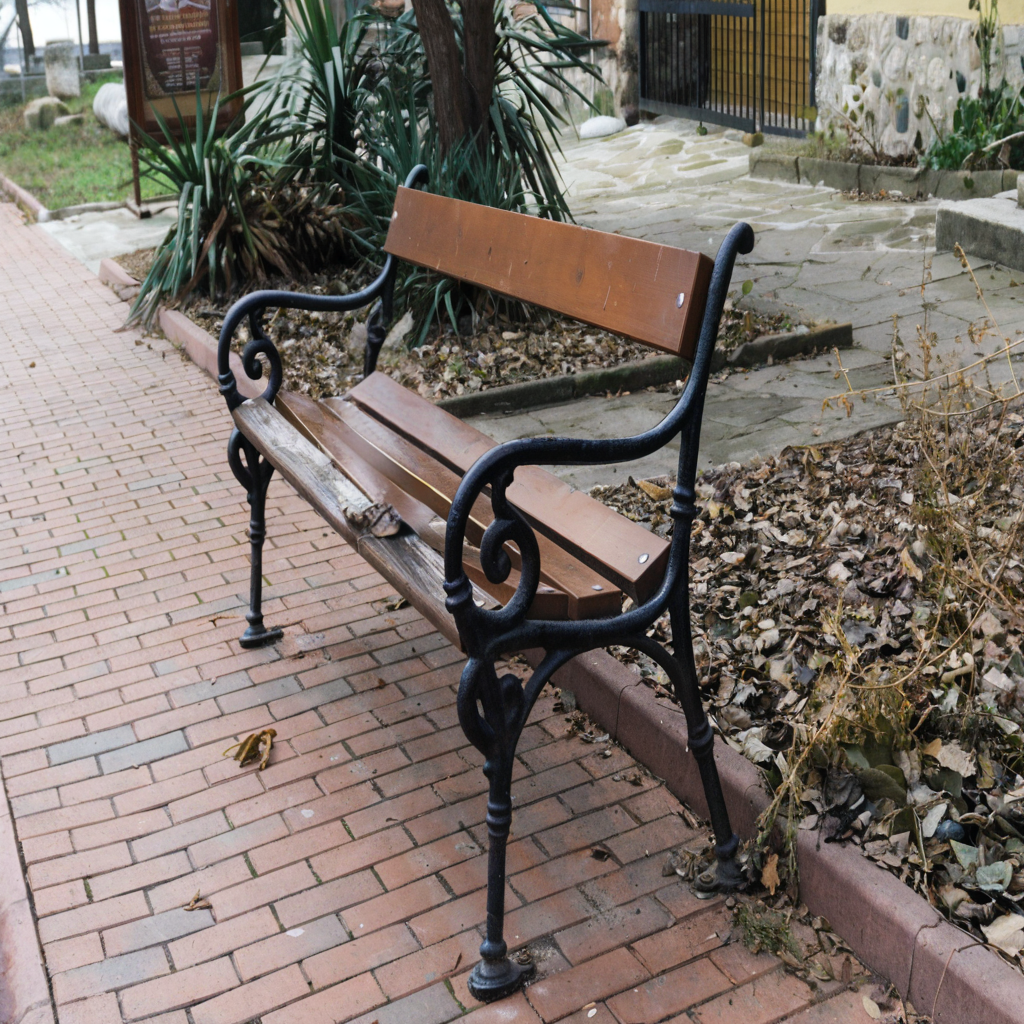

In [ ]:
display(image)

In [28]:
# Regular stable diffusion model

from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2-base"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
# pipe = pipe
print(pipe)

# prompt = "a photo of an astronaut riding a horse on mars"
# image = pipe(prompt).images[0]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.29.1",
  "_name_or_path": "stabilityai/stable-diffusion-2-base",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



In [29]:
print(pipe.vae.encoder)
encoder2 = pipe.vae.encoder

Encoder(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (down_blocks): ModuleList(
    (0): DownEncoderBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
        )
      )
    )
    (1): DownEncoderBlock2D(
      (resnets): ModuleList(
        (0): ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [30]:
latent = encoder2(img_tensor)

RuntimeError: Expected weight to be a vector of size equal to the number of channels in input, but got weight of shape [128] and input of shape [128, 512, 512]

In [12]:
print(pipe.unet)

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Linear(in_features=320, out_features=320, bias=True)
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_f

# Erase Training

1. Get Encoder and Decoder from stable diffusion inpainting model
2. Implement forward process of adding noise based on HiFA noise scheduler

  Time step annealing. Instead of randomly sampling timesteps for each image, we use a concrete approach (eq 5) in HiFA

  t_min = 0.2 t_max = 0.98

  This scheduling allocates more training iterations to lower values of timestep t, ensuring that fine-grained details are captures in the later iterations of training.

3. Create denoising Unet - it's weights will be updated based on the Erase loss formula which is influenced by the output of E and D

    UNet is conditioned with:
    Image
    Mask
    Empty prompt


In [6]:
import math
t_min = 0.2
t_max = 0.98

total_iter = 20000
curr_iter = 100

timestep = t_max - (t_max - t_min) * math.sqrt(curr_iter / total_iter)
print(timestep)

0.9248456710674493
